Sometimes we get dataset in which some cols can have both numerical and categorical data. For eg: A12, B45, C55, D21 etc. 
We need to know how to effectively handle such columns and here I'm going to show how.

In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('toy_titanic.csv')
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [10]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

In [28]:
# this code will add new columns into our df. setting errors = 'raise' will raise an error, coerce will accept the NaN val. downcast='integer' will return the smallest int dtypes 
df['number_numerical'] = pd.to_numeric(df['number'], errors='coerce', downcast='integer')
df['number_categorical'] = np.where(df['number_numerical'].isnull(), df['number'], np.nan) # np.where(condition, a if condition is true, b if false)

In [30]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [32]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [52]:
df['Cabin_cat'] = df['Cabin'].str[0]
df['Cabin_num'] = df['Cabin'].str.extract('(\d+\.?\d*)')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\12368\AppData\Local\Temp\ipykernel_36680\1090680381.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Cabin_num'] = df['Cabin'].str.extract('(\d+\.?\d*)')


<Axes: xlabel='Cabin_cat'>

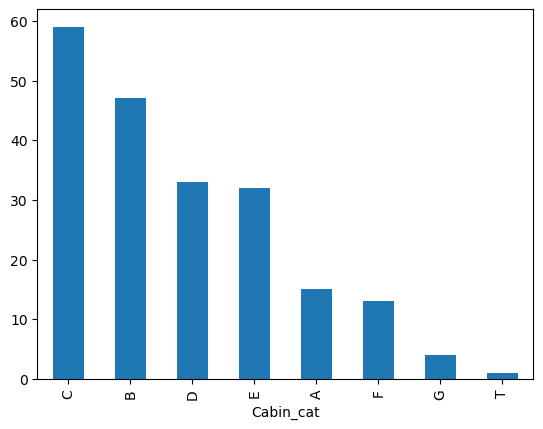

In [64]:
df['Cabin_cat'].value_counts().plot(kind='bar')

In [66]:
df['Cabin_num']

0      NaN
1       85
2      NaN
3      123
4      NaN
      ... 
886    NaN
887     42
888    NaN
889    148
890    NaN
Name: Cabin_num, Length: 891, dtype: object

In [74]:
df['Ticket'].sample(10)

433    STON/O 2. 3101274
128                 2668
864               233866
71               CA 2144
472           C.A. 34651
722                12233
843                 2683
822                19972
768               371110
140                 2678
Name: Ticket, dtype: object

In [92]:
## separate categorical and numerical values from the 'Ticket' columns
df['Ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['Ticket_num'] = pd.to_numeric(df['Ticket_num'], errors='coerce', downcast='integer')

df['Ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['Ticket_cat'] = np.where(df['Ticket_cat'].str.isdigit(), np.nan, df['Ticket_cat'])

In [94]:
df['Ticket_cat']

0           A/5
1            PC
2      STON/O2.
3           NaN
4           NaN
         ...   
886         NaN
887         NaN
888       W./C.
889         NaN
890         NaN
Name: Ticket_cat, Length: 891, dtype: object